<p style ="text-align:center">
    <img src="http://epecora.com.br/DataFiles/PPGOLD_PPGMNE.png" width="700" alt="PPGOLD Data Science: INTRO"  />
</p>

# Data Science 2 - Aula 03
## Prof. Eduardo Pécora, Ph.D.

# Ridge Regression
Tempo estimado: **30** minutos

## Objetivos

Após completar esta aula, você será capaz de:

* Calcular o erro R^2
* Calcular o MAD,MSE e MSRE

## Bibliotecas

In [20]:
# importando a biblioteca pandas para manipulação de dados
import pandas as pd

# Iportando numpy para criar, manipular e operar em arrays multidimensionais, bem como para realizar operações matemáticas avançadas.
import numpy as np

# Importando a biblioteca math que fornece funções matemáticas básicas
import math 

# importando as bibliotecas do matplotlib para gerar gráficos
import matplotlib as mpl
import matplotlib.pyplot as plt

# Importando biblioteca do seaborn para gerar gráficos mais atraentes e informativos
import seaborn as sns

# Importando a classe LinearRegression do sklearn 
# Essa classe implementa uma versão da regressão linear simples ou múltipla
# Usado para modelar a relação entre uma variável dependente contínua e uma ou mais variáveis independentes.
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Usado para exibir os gráficos gerados pela biblioteca Matplotlib diretamente no notebook, sem precisar abrir uma janela externa.
%matplotlib inline

## Obtendo dados

In [21]:
# O objeto ainda está vazio. 
caminho = "" 

# Caminho do arquivo csv
caminho = "https://raw.githubusercontent.com/EduPekUfpr/DS02_PPGOLD/main/Data/MeuAutoLimpo.csv" 

#Obtendo arquivo e passando-o para um dataframe
df = pd.read_csv(caminho)

# drop as colunas não numéricas
string_cols = ['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
            'drive-wheels', 'engine-location','engine-type', 'num-of-cylinders', 'fuel-system']
df_linear_multipla = df.drop(string_cols, axis=1)

In [22]:
lm = LinearRegression()

# Selecionar as variáveis independentes
drop_cols = ["price", 'normalized-losses', "symboling", "highway-mpg", 
             "city-mpg","engine-size","horsepower"]
X = df_linear_multipla.drop(drop_cols, axis = 1)
Y = df_linear_multipla['price']
print("Shape = ",X.shape)

# Carregando o modelo
lm.fit(X, Y)

# Exibindo o R^2
R2=lm.score(X,Y)

print("SCORE: %.4f" % R2)

# Adicionando XX colunas aleatórias no DF original
for i in range(10):
    col_name = 'Random_' + str(i+1)
    df_linear_multipla[col_name] = np.random.randint(1, 100, size=len(df))
df.head()

# Criando as novas variáveis
X = df_linear_multipla.drop(drop_cols, axis = 1)
Y = df_linear_multipla['price']
print("Shape = ",X.shape)

# Carregando o modelo
lm.fit(X, Y)

# Exibindo o R^2
R2=lm.score(X,Y)

print("SCORE: %.4f" % R2)

Shape =  (201, 9)
SCORE: 0.7421
Shape =  (201, 19)
SCORE: 0.7544


### Cálculo dos erros

LM
 Mean Squared Error: 34843421.441388376
SCORE: 0.6771
Melhor Alpha R2:  1.2024048096192383
Melhor R2      :  0.6772018023851729


/opt/anaconda3/envs/ppgold/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/ppgold/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


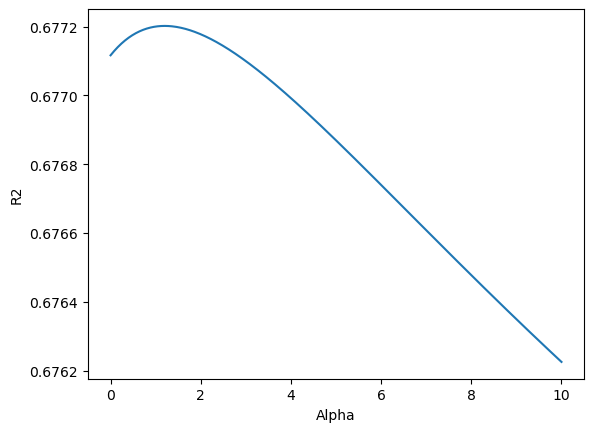

Melhor Alpha MSE:  1.2024048096192383
Melhor MSE      :  34834208.10308183


/opt/anaconda3/envs/ppgold/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/ppgold/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


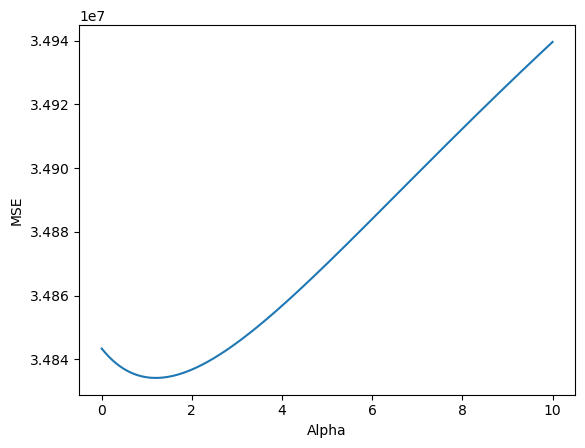

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

import numpy as np

X = df_linear_multipla.drop(drop_cols, axis = 1)
Y = df_linear_multipla['price']

#print(X.head())
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

# Standardize the features
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

X_train_scaled = X_train
X_test_scaled  = X_test

df_ridge = pd.DataFrame(columns=['Alpha', 'R2', 'MSE'])

intervalo = np.linspace(0,10,500)

# Train a Ridge regression model
R2_best = 0
Alpha_R2 = 0
MSE_best = np.inf
Alpha_MSE = 0
for i in intervalo:
    ridge = Ridge(alpha=i)  # alpha is the regularization strength
    ridge.fit(X_train_scaled, y_train)

    # Exibindo o R^2
    R2=ridge.score(X_test_scaled,y_test)
    #print("SCORE: %.4f" % R2)

    # Predict on the test set
    y_pred_ridge = ridge.predict(X_test_scaled)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred_ridge)
    new_row = [i, R2, mse]
    df_ridge.loc[len(df_ridge)] = new_row
    if R2 > R2_best:
        R2_best = R2
        Alpha_R2 = i
    if mse < MSE_best:
        MSE_best = mse
        Alpha_MSE = i
    
# Train a Linear regression model
lm.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_lm = lm.predict(X_test_scaled)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred_lm)
print("LM\n Mean Squared Error:", mse)
# Exibindo o R^2
R2=lm.score(X_test_scaled,y_test)
print("SCORE: %.4f" % R2)

print("Melhor Alpha R2: ", Alpha_R2)
print("Melhor R2      : ", R2_best)
sns.lineplot(data=df_ridge, x="Alpha", y="R2")
plt.show()

print("Melhor Alpha MSE: ", Alpha_MSE)
print("Melhor MSE      : ", MSE_best)
sns.lineplot(data=df_ridge, x="Alpha", y="MSE")
plt.show()

## Autores

<a href="https://www.linkedin.com/in/eduardopecora/" target="_blank">Eduardo Pecora</a>

## Log de modificações

| Data | Versão | Modificado por | Descrição |
| -----------| ------- | ---------- | ---------------------------------- |
| 22-04-2024       | 1.0   | Eduardo Pecora    | Estrutura Aula        |

## <h3 align="center"> (c) Eduardo Pécora/ UFPR 2024. All rights reserved. <h3/>
